<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [20]:
### Import data science libraries
import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [21]:
# Read CSV
house = pd.read_csv(r"C:\Users\micha\Documents\GitHub\ds-mel-pt-24feb-projects\MichaelPresidente\Data\Sacramento_transactions.csv")

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

Target variable -- The “target variable” is the variable whose values are to be modeled and predicted by other variables. It is analogous to the dependent variable (i.e., the variable on the left of the equal sign) in linear regression. 
Refer:
Classes and Types of Variables

#### https://www.dtreg.com/solution/view/15

In [22]:
# ANSWER
# price 
house["price"]

0       59222
1       68212
2       68880
3       69307
4       81900
        ...  
980    232425
981    234000
982    235000
983    235301
984    235738
Name: price, Length: 985, dtype: int64

#### 2.2 List all possible variables which might be Predictor variable.

In [23]:
# ANSWER
## beds,baths,sq_ft
house[["beds","baths","sq__ft"]]


beds  baths  sq__ft
0       2      1     836
1       3      1    1167
2       2      1     796
3       2      1     852
4       2      1     797
..    ...    ...     ...
980     4      3    2280
981     3      2    1477
982     3      2    1216
983     4      2    1685
984     3      2    1362

[985 rows x 3 columns]

#### 2.2 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

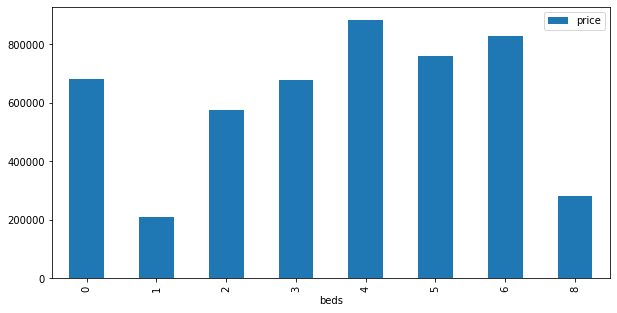

In [24]:
# ANSWER
# No of Beds - this variable offers an absolute comparision between all types of houses
# house.hist(figsize=(15,10))
sqft = house[["beds","price"]].copy()
sqft_plot = sqft.groupby("beds").agg("max")

sqft_plot.plot.bar(figsize=[10,5])

#### 2.3 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

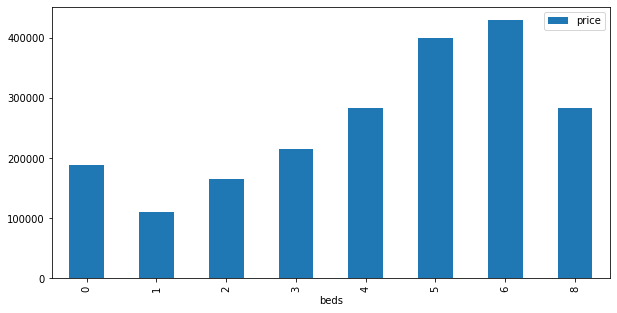

In [25]:
# ANSWER
# The mean prices of houses by number of bedrooms is the 
sqft = house[["beds","price"]].copy()
sqft_plot = sqft.groupby("beds").agg("mean")

sqft_plot.plot.bar(figsize=[10,5])



#### 2. 4 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

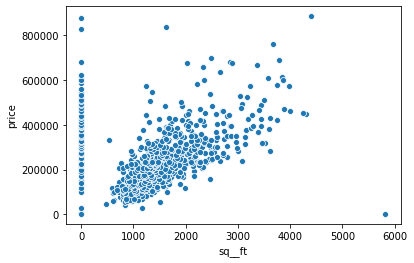

In [40]:
# ANSWER
# Another way to predict price is by another size demension - sqt__ft

sns.scatterplot(x="sq__ft", y="price", data=house)

In [44]:
# Remove the 171 0 sqt__ft values  
house.to_csv(r"C:\Users\micha\Documents\GitHub\ds-mel-pt-24feb-projects\MichaelPresidente\Data\sq_ft.csv")


In [45]:
sqft_plot= pd.read_csv(r"C:\Users\micha\Documents\GitHub\ds-mel-pt-24feb-projects\MichaelPresidente\Data\sq_ft.csv")

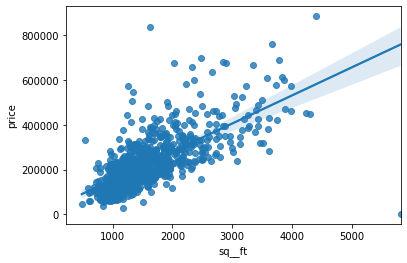

In [46]:
# Residuals as the data points that do not appear on the line of best fit.

sns.regplot(x="sq__ft", y="price", data=sqft_plot)

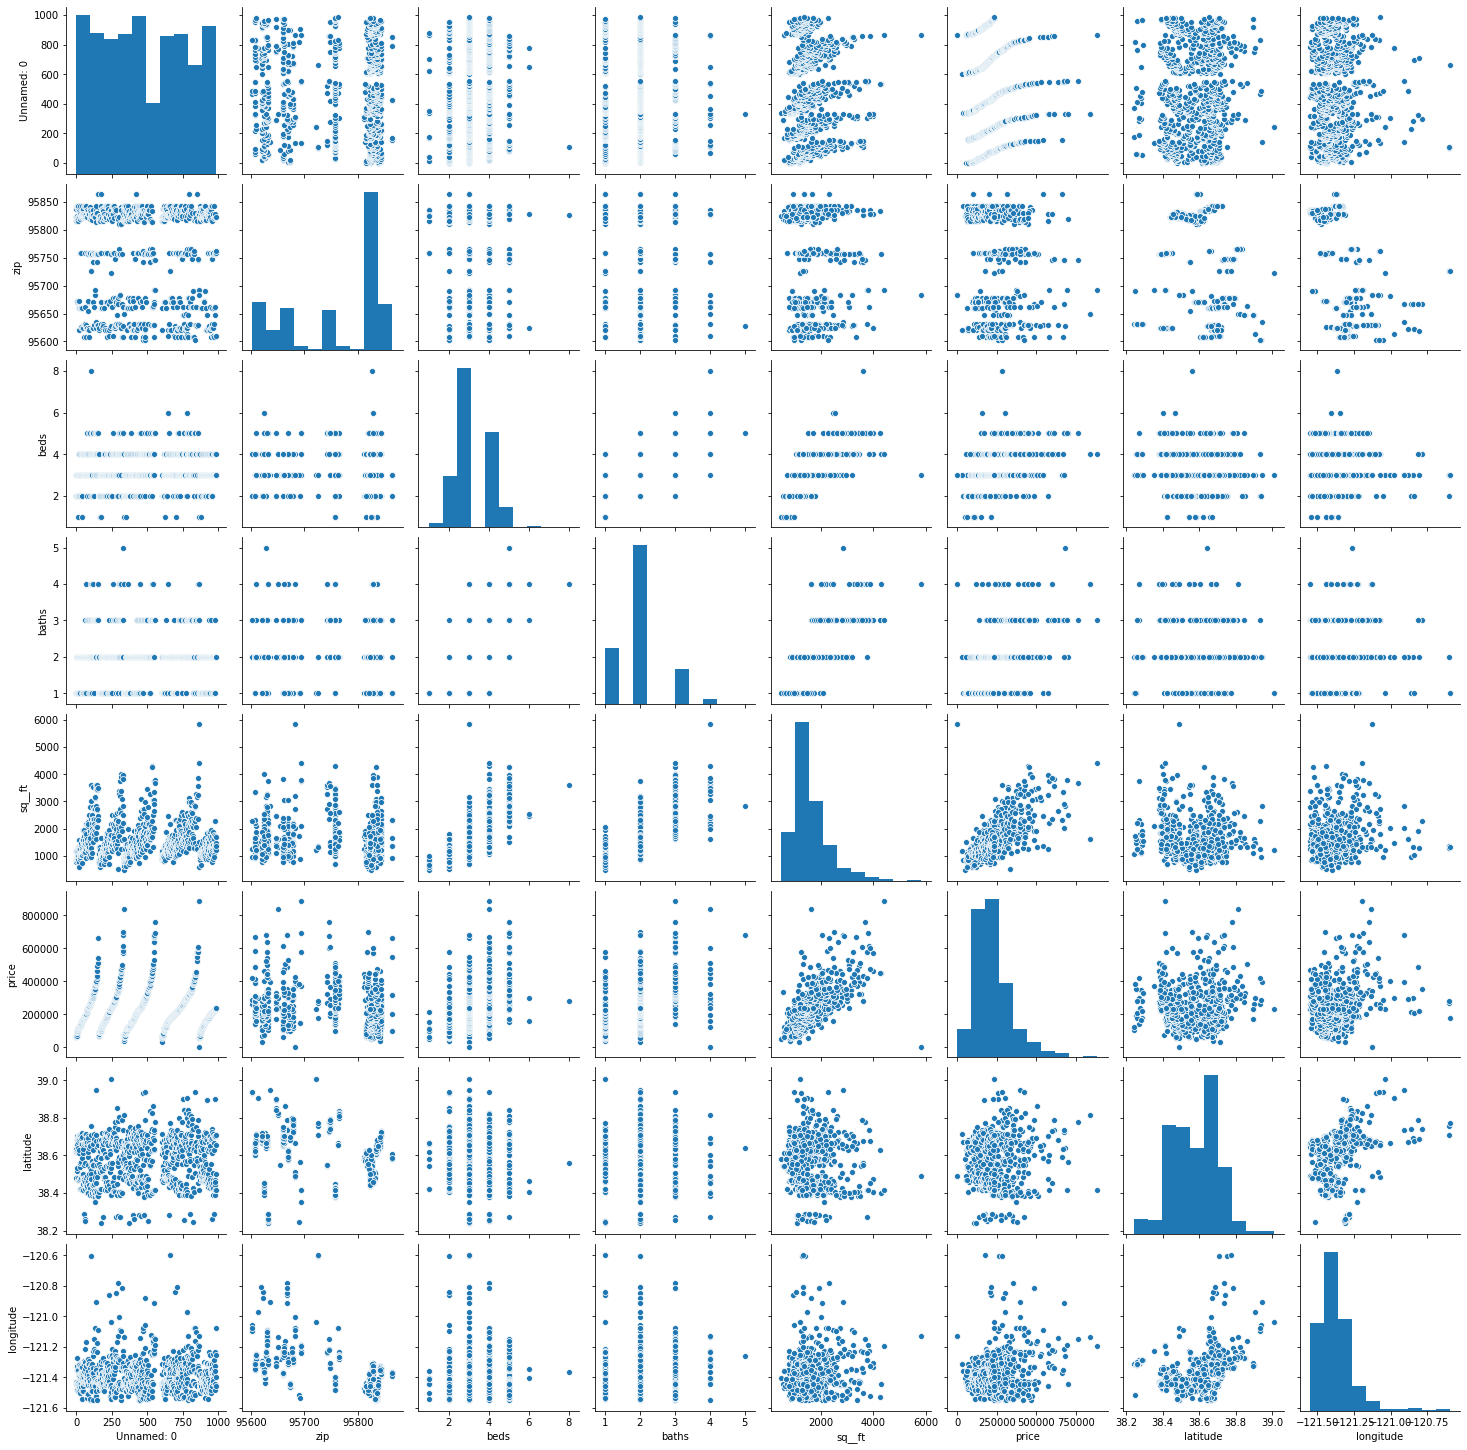

In [53]:
# Is this a normal distribution?
sns.pairplot(sqft_plot)

In [56]:
sqft_plot.corr()

Unnamed: 0       zip      beds     baths    sq__ft     price  \
Unnamed: 0    1.000000 -0.014993  0.026991 -0.006764  0.027152  0.060968   
zip          -0.014993  1.000000 -0.072673 -0.103332 -0.101560 -0.219591   
beds          0.026991 -0.072673  1.000000  0.654746  0.695710  0.441988   
baths        -0.006764 -0.103332  0.654746  1.000000  0.724631  0.501820   
sq__ft        0.027152 -0.101560  0.695710  0.724631  1.000000  0.693708   
price         0.060968 -0.219591  0.441988  0.501820  0.693708  1.000000   
latitude      0.064980 -0.134134 -0.107440 -0.081249 -0.103287  0.058475   
longitude     0.010354 -0.562983  0.056713  0.108081  0.135809  0.278312   

            latitude  longitude  
Unnamed: 0  0.064980   0.010354  
zip        -0.134134  -0.562983  
beds       -0.107440   0.056713  
baths      -0.081249   0.108081  
sq__ft     -0.103287   0.135809  
price       0.058475   0.278312  
latitude    1.000000   0.344431  
longitude   0.344431   1.000000

#### 2.5  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.5 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [27]:
# ANSWER

##### 2.5.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [28]:
# ANSWER

##### 2.5.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [29]:
# ANSWER

##### 2.4.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [30]:
# ANSWER

##### 2.5.D Find Resudals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [31]:
# ANSWER

##### 2.5.D Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [32]:
# ANSWER

##### 2.5.G [BONUS] Draw Plot of Predicted Line

In [33]:
# ANSWER

##### 2.5.G [BONUS] Draw Plot of Predicted Line With Resudals

In [34]:
# ANSWER

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [35]:
# ANSWER



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



